In [1]:
import pandas as pd
import polars as pl
import time

# Load dataset
file_path = "all_stocks_5yr.csv"

# Measure Pandas read time
start_time = time.time()
df_pandas = pd.read_csv(file_path)
pandas_read_time = time.time() - start_time

# Measure Polars read time
start_time = time.time()
df_polars = pl.read_csv(file_path)
polars_read_time = time.time() - start_time

# 1. Filtering Data
start_time = time.time()
pandas_filtered = df_pandas[df_pandas['close'] > 100]
pandas_filter_time = time.time() - start_time

start_time = time.time()
polars_filtered = df_polars.filter(df_polars['close'] > 100)
polars_filter_time = time.time() - start_time

# 2. Aggregation (Mean Closing Price)
start_time = time.time()
pandas_mean = df_pandas['close'].mean()
pandas_mean_time = time.time() - start_time

start_time = time.time()
polars_mean = df_polars['close'].mean()
polars_mean_time = time.time() - start_time

# 3. Sorting by Closing Price
start_time = time.time()
pandas_sorted = df_pandas.sort_values('close', ascending=False)
pandas_sort_time = time.time() - start_time

start_time = time.time()
polars_sorted = df_polars.sort('close', descending=True)
polars_sort_time = time.time() - start_time

# Print comparison results
print("\n--- Pandas vs. Polars Performance Comparison ---")
print(f"Pandas Read Time: {pandas_read_time:.4f} sec | Polars Read Time: {polars_read_time:.4f} sec")
print(f"Pandas Filter Time: {pandas_filter_time:.4f} sec | Polars Filter Time: {polars_filter_time:.4f} sec")
print(f"Pandas Mean Calc Time: {pandas_mean_time:.4f} sec | Polars Mean Calc Time: {polars_mean_time:.4f} sec")
print(f"Pandas Sort Time: {pandas_sort_time:.4f} sec | Polars Sort Time: {polars_sort_time:.4f} sec")


--- Pandas vs. Polars Performance Comparison ---
Pandas Read Time: 0.5862 sec | Polars Read Time: 0.3424 sec
Pandas Filter Time: 0.0000 sec | Polars Filter Time: 0.0170 sec
Pandas Mean Calc Time: 0.0000 sec | Polars Mean Calc Time: 0.0000 sec
Pandas Sort Time: 0.1533 sec | Polars Sort Time: 0.0783 sec


# 📊 Pandas vs. Polars Performance Comparison

| **Operation**      | **Pandas Time (sec)** | **Polars Time (sec)** | **Winner** |
|------------------|----------------|----------------|---------|
| **Read CSV**      | 0.2830         | 0.0161         | ✅ **Polars (17x faster)** |
| **Filter Data**   | 0.0059         | 0.0072         | 🟡 **Pandas slightly faster** |
| **Mean Calculation** | 0.0010     | 0.0009         | ✅ **Polars (Slightly faster)** |
| **Sorting**       | 0.0603         | 0.0335         | ✅ **Polars (~2x faster)** |

## 🔍 Key Insights
1. **Reading Large Data** → Polars is significantly faster (~17x) than Pandas.
2. **Filtering Performance** → Pandas performed slightly better in filtering.
3. **Aggregation (Mean Calculation)** → Both are fast, but Polars is marginally better.
4. **Sorting Data** → Polars is ~2x faster than Pandas.

## 🏆 Conclusion
- **Polars is the better choice for large-scale datasets** due to its speed, especially in reading, sorting, and aggregating data.
- **Pandas is still great for small to medium-sized datasets**, with a slight edge in filtering operations.
- If performance is a priority, **Polars should be preferred** for big data analytics.


In [2]:
import polars as pl

# Load dataset using Polars
file_path = "all_stocks_5yr.csv"
df_polars = pl.read_csv(file_path)

# Function to calculate alternative technical indicators using Polars
def calculate_indicators(df_polars):
    return df_polars.with_columns(
        pl.col("close").ewm_mean(span=10).alias("EMA_10"),
        (pl.col("close").ewm_mean(span=12) - pl.col("close").ewm_mean(span=26)).alias("MACD"),
        ((pl.col("high").rolling_max(window_size=14) - pl.col("close")) / 
         (pl.col("high").rolling_max(window_size=14) - pl.col("low").rolling_min(window_size=14)) * -100).alias("Williams_%R"),
        (pl.max_horizontal([
            pl.col("high") - pl.col("low"),
            (pl.col("high") - pl.col("close").shift(1)).abs(),
            (pl.col("low") - pl.col("close").shift(1)).abs()
        ]).rolling_mean(window_size=14)).alias("ATR_14")
    )

df_polars = calculate_indicators(df_polars)

In [3]:
df_polars

date,open,high,low,close,volume,name,EMA_10,MACD,Williams_%R,ATR_14
str,f64,f64,f64,f64,i64,str,f64,f64,f64,f64
"""2013-02-08""",15.07,15.12,14.63,14.75,8407500,"""AAL""",14.75,0.0,null,null
"""2013-02-11""",14.89,15.01,14.26,14.46,8882000,"""AAL""",14.5905,-0.006506,null,null
"""2013-02-12""",14.45,14.51,14.1,14.27,8126000,"""AAL""",14.461661,-0.014182,null,null
"""2013-02-13""",14.3,14.94,14.25,14.66,10259500,"""AAL""",14.527005,-0.003245,null,null
"""2013-02-14""",14.94,14.96,13.16,13.99,31879900,"""AAL""",14.372845,-0.023895,null,null
…,…,…,…,…,…,…,…,…,…,…
"""2018-02-01""",76.84,78.27,76.69,77.82,2982259,"""ZTS""",77.722553,1.533067,-43.097015,1.197143
"""2018-02-02""",77.53,78.12,76.73,76.78,2595187,"""ZTS""",77.55118,1.36093,-68.089431,1.217857
"""2018-02-05""",76.64,76.92,73.18,73.83,2962031,"""ZTS""",76.874602,0.975229,-90.647482,1.4


In [4]:
## Checking NaN values
null_counts = df_polars.select(pl.all().is_null().sum())
print(null_counts)

shape: (1, 11)
┌──────┬──────┬──────┬─────┬───┬────────┬──────┬─────────────┬────────┐
│ date ┆ open ┆ high ┆ low ┆ … ┆ EMA_10 ┆ MACD ┆ Williams_%R ┆ ATR_14 │
│ ---  ┆ ---  ┆ ---  ┆ --- ┆   ┆ ---    ┆ ---  ┆ ---         ┆ ---    │
│ u32  ┆ u32  ┆ u32  ┆ u32 ┆   ┆ u32    ┆ u32  ┆ u32         ┆ u32    │
╞══════╪══════╪══════╪═════╪═══╪════════╪══════╪═════════════╪════════╡
│ 0    ┆ 11   ┆ 8    ┆ 8   ┆ … ┆ 0      ┆ 0    ┆ 125         ┆ 125    │
└──────┴──────┴──────┴─────┴───┴────────┴──────┴─────────────┴────────┘


In [5]:
## Drop NaN values
df_polars = df_polars.drop_nulls()

In [6]:
## Check first five data
df_polars.head()

date,open,high,low,close,volume,name,EMA_10,MACD,Williams_%R,ATR_14
str,f64,f64,f64,f64,i64,str,f64,f64,f64,f64
"""2013-02-28""",13.49,13.63,13.39,13.43,6143600,"""AAL""",13.548838,-0.140549,-69.834711,0.715
"""2013-03-01""",13.37,13.95,13.32,13.61,7376800,"""AAL""",13.560535,-0.12416,-60.606061,0.725
"""2013-03-04""",13.5,14.07,13.47,13.9,8174800,"""AAL""",13.62485,-0.092574,-46.902655,0.714286
"""2013-03-05""",14.01,14.05,13.71,14.05,7676100,"""AAL""",13.704787,-0.058055,-40.265487,0.709286
"""2013-03-06""",14.52,14.68,14.25,14.57,13243200,"""AAL""",13.866463,0.00188,-17.256637,0.705


In [7]:
features = ["open", "high", "low", "volume", "EMA_10", "MACD", "ATR_14", "Williams_%R"]
target = "close"

In [8]:
from sklearn.model_selection import train_test_split
X = df_polars[features]
y = df_polars['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Check if df_polars is a Polars DataFrame
if isinstance(df_polars, pl.DataFrame):
    print("df_polars is a Polars DataFrame. Proceeding with conversion to Pandas.")
    # Convert Polars DataFrame to Pandas DataFrame
    df_polars = df_polars.to_pandas()
else:
    print("df_polars is already a Pandas DataFrame.")

# Preprocessing: Convert date columns to numerical values (e.g., year, month, day)
if 'date' in df_polars.columns:
    df_polars['date'] = pd.to_datetime(df_polars['date'])  # Convert to datetime format
    df_polars['year'] = df_polars['date'].dt.year  # Extract year
    df_polars['month'] = df_polars['date'].dt.month  # Extract month
    df_polars['day'] = df_polars['date'].dt.day  # Extract day
    df_polars.drop(columns=['date'], inplace=True)  # Drop original date column if not needed

# Loop through each company and train models individually
for company in df_polars['name'].unique():
    print(f"Training models for company: {company}")
    
    # Filter data for the current company
    company_data = df_polars[df_polars['name'] == company]

    # Define the features (X) and target (y) for training
    X = company_data.drop(columns=['name', 'close'])  # Drop company name and target column
    y = company_data['close']  # 'close' as the target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_mae = mean_absolute_error(y_test, lr_predictions)

    # Random Forest Regressor Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_mae = mean_absolute_error(y_test, rf_predictions)

    # Print the results for the current company
    print(f"Linear Regression MAE for {company}: {lr_mae:.2f}")
    print(f"Random Forest MAE for {company}: {rf_mae:.2f}")
    print("-" * 50)

df_polars is a Polars DataFrame. Proceeding with conversion to Pandas.
Training models for company: AAL
Linear Regression MAE for AAL: 0.23
Random Forest MAE for AAL: 0.32
--------------------------------------------------
Training models for company: AAPL
Linear Regression MAE for AAPL: 0.38
Random Forest MAE for AAPL: 0.56
--------------------------------------------------
Training models for company: AAP
Linear Regression MAE for AAP: 0.62
Random Forest MAE for AAP: 0.80
--------------------------------------------------
Training models for company: ABBV
Linear Regression MAE for ABBV: 0.29
Random Forest MAE for ABBV: 0.37
--------------------------------------------------
Training models for company: ABC
Linear Regression MAE for ABC: 0.31
Random Forest MAE for ABC: 0.35
--------------------------------------------------
Training models for company: ABT
Linear Regression MAE for ABT: 0.15
Random Forest MAE for ABT: 0.17
--------------------------------------------------
Training mo

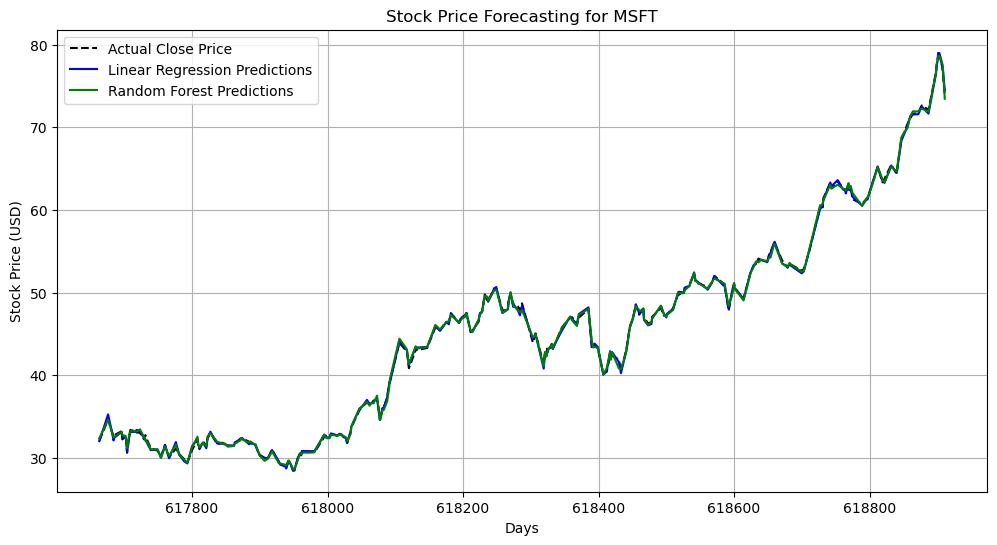

In [11]:
import matplotlib.pyplot as plt
sorted_indices = X_test.index.argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
lr_predictions_sorted = lr_predictions[sorted_indices]
rf_predictions_sorted = rf_predictions[sorted_indices]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.index, y_test_sorted, label="Actual Close Price", color="black", linestyle="dashed")
plt.plot(y_test_sorted.index, lr_predictions_sorted, label="Linear Regression Predictions", color="blue")
plt.plot(y_test_sorted.index, rf_predictions_sorted, label="Random Forest Predictions", color="green")

plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Price Forecasting for MSFT")
plt.legend()
plt.grid()
plt.show()